In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1D Ising model + Transfer matrix

* Construct the transfer matrix at temperature $T$ with external field $B$
* Find the eivenvalues of the transfer matrix and compare to the exact results.
* Evaluate the partition function $Z$ at different system size $N$ and $T$, $B$. Compare to the exact results.
* For a fixed $N$, $T$, $B$, evaluate $\langle S_0 S_j\rangle$ where $j=0,1,\cdots N$. 
* Plot $\langle S_0 S_j\rangle$ up to $j=N/2$ and show that it decays exponentially.
  * Please try several $N$, $T$, $B$. What is the largest $N$ you can go? What is the lowest $T$ you can go?

In [2]:
#第一題 Construct the transfer matrix at temperature 𝑇 with external field 𝐵
def transfer_matrix(t,B,J):
    kb = 1
    beta = 1/(kb*t)
    T = np.array([[np.exp(beta*(J+B)),np.exp(-beta*J)],[np.exp(-beta*J),np.exp(beta*(J-B))]])
    return T    

In [3]:
print('transfer_matrix(t=1,B=5,J=1)=',transfer_matrix(1,5,1))

transfer_matrix(t=1,B=5,J=1)= [[4.03428793e+02 3.67879441e-01]
 [3.67879441e-01 1.83156389e-02]]


In [4]:
#第二題 Find the eivenvalues of the transfer matrix and compare to the exact results.
eigenvalue, eigenvector = np.linalg.eig(transfer_matrix(1,5,1))
print("eigenvalue:",eigenvalue)
print("eigenvector:",eigenvector)

eigenvalue: [4.03429129e+02 1.79801613e-02]
eigenvector: [[ 9.99999584e-01 -9.11922229e-04]
 [ 9.11922229e-04  9.99999584e-01]]


In [5]:
def eigen_exact(t,B,J):
    kb = 1
    beta = 1/(kb*t)
    lambda_1 = np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    lambda_2 = np.exp(beta*J)*np.cosh(beta*B) - np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    lambda_ = np.array([lambda_1,lambda_2])
    return lambda_   

In [6]:
print('exact eigenvalue:',eigen_exact(1,5,1))

exact eigenvalue: [4.03429129e+02 1.79801613e-02]


In [7]:
#第三題 Evaluate the partition function 𝑍 at different system size 𝑁 and 𝑇 ,𝐵. Compare to the exact results.
def partition_function(t,B,J,N):
    T = transfer_matrix(t,B,J)
    z = np.array([[1,0],[0,1]])
    for i in range (N):
        z = np.dot(z,T)
    tracez = np.trace(z)
    return tracez

def partition_function_exac(t,B,J,N):
    kb = 1
    beta = 1/(kb*t)
    lambda_1 = np.exp(beta*J)*np.cosh(beta*B) + np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    lambda_2 = np.exp(beta*J)*np.cosh(beta*B) - np.sqrt(np.exp(-2*beta*J) + np.exp(2*beta*J)*np.sinh(beta*B)**2)
    zz = (lambda_1**N) + (lambda_2**N)
    return zz

In [8]:
print('when t=1,B=5,J=1,N=100 :')
print('partition function:',partition_function(1,5,1,100))
print('exact partition function:',partition_function_exac(1,5,1,100))

when t=1,B=5,J=1,N=100 :
partition function: 3.7733340653022634e+260
exact partition function: 3.77333406530227e+260


In [9]:
# another way to define the partition function -- np.linalg.matrix_power
def partition_function2(t,B,J,N):
    T = transfer_matrix(t,B,J)
    Z_cal =np.trace(np.linalg.matrix_power(T, N))
    return Z_cal

print('partition function:',partition_function2(1,5,1,100))

partition function: 3.773334065302269e+260


when t=1,B=0,J=1,N=32 it shows :


Text(0.5, 1.0, 'N = 32')

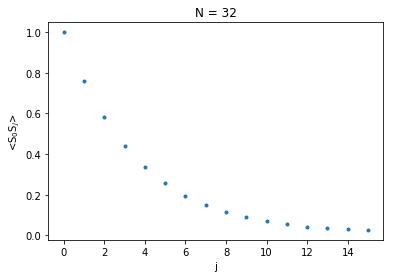

In [10]:
#第四題 For a fixed 𝑁 ,𝑇 ,𝐵 ,evaluate ⟨𝑆0𝑆𝑗⟩ where 𝑗=0,1,⋯𝑁. Plot ⟨𝑆0𝑆𝑗⟩ up to 𝑗=𝑁/2  and show that it decays exponentially.
def correlation_function(t,B,J,N):
    kb = 1
    beta = 1/(kb*t)
    Tz = np.array([[1,0],[0,-1]])
    T = transfer_matrix(t,B,J)
    SzSz = np.zeros(N+1)
    for j in range(N):
        z = np.array([[1,0],[0,1]])
        z_s0sj = Tz
        for i in range(N):
            z = np.dot(z,T)
            if i == j:
                z_s0sj = z_s0sj @ Tz @ T
            else :
                z_s0sj = np.dot(z_s0sj,T)    
            SzSz[j] = np.trace(z_s0sj)/np.trace(z)
    SzSz[N] = SzSz[0]
    
    fig, ax = plt.subplots()
    ax.plot(SzSz[0:N//2],'.') 
    plt.xlabel('j')
    plt.ylabel('<S$_{0}$S$_{j}$>')

correlation_function(1,0,1,32)
print('when t=1,B=0,J=1,N=32 it shows :')
plt.title('N = 32')


when t=1,B=0,J=1,N=629 it shows :


Text(0.5, 1.0, 'N = 629')

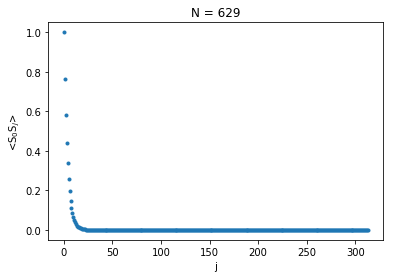

In [11]:
#第五題 Please try several 𝑁,𝑇,𝐵. What is the largest 𝑁 you can go? What is the lowest 𝑇 you can go?
correlation_function(1,0,1,629)
print('when t=1,B=0,J=1,N=629 it shows :')
plt.title('N = 629')

C:\Users\je871\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


when t=1,B=0,J=1,N=630 it shows :
The largest N = 629, it cannot run at N = 630.


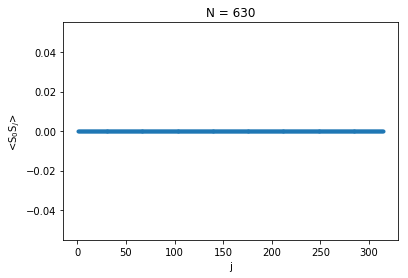

In [30]:
correlation_function(1,0,1,630)
print('when t=1,B=0,J=1,N=630 it shows :')
plt.title('N = 630')

print('The largest N = 629, it cannot run at N = 630.' )

when t=0.1104,B=0,J=1,N=32 it shows :


Text(0.5, 1.0, 'N = 32 , t = 0.1104')

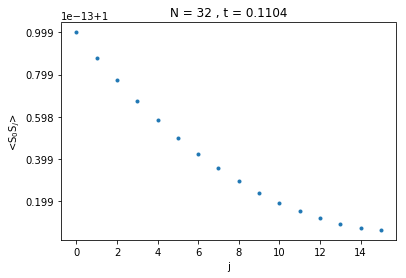

In [31]:
correlation_function(0.1104,0,1,32)
print('when t=0.1104,B=0,J=1,N=32 it shows :')
plt.title('N = 32 , t = 0.1104')

when t=0.1103,B=0,J=1,N=32 it shows :
The lowest t = 0.1104, it cannot show decay at t = 0.1103.


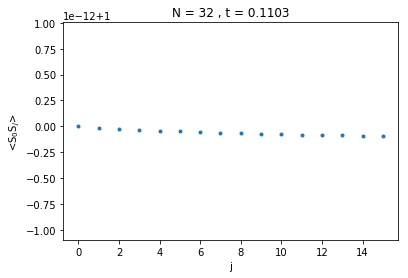

In [32]:
correlation_function(0.1103,0,1,32)
print('when t=0.1103,B=0,J=1,N=32 it shows :')
plt.title('N = 32 , t = 0.1103')

print('The lowest t = 0.1104, it cannot show decay at t = 0.1103.' )